# Lab-1.1: 

* Neural network training typically follows a fairly standardized workflow, for both classification and regression problems.
* In this lab we work through this workflow for a simple 1D case.

**Instructions** 
* Read and work through all tutorial content and do all exercises below
  
**Submission:**
* You need to upload TWO documents to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook 
  * (2) The .ipynb version of the completed form of this notebook 
  * Failure to submit BOTH versions will result in a 10% deduction per missing document.
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

## Part-1: Optimization 
* For the case of parametric models, such as Neural-Networks, the "training" consists of a multi-variable optimization problem.
* Therefore before getting started with the ML workflow, we will show a simple optimization example using Scipy.
* The point of the optimization is to "search" for the fitting parameters of the model which minimize some "objective" function.
* Where the objective function quantifies how 'bad' the model is.

In [1]:
# IMPORT PACKAGES
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from   scipy.optimize import minimize

In [2]:
num_func_eval=1
def f(x):
	global num_func_eval

	#OBJECTIVE FUNCTION
	out=(x+1)**2.0+1.

	#JUST SOME OUTPUT TO MONITOR DURING FITTING
	if(num_func_eval%1==0 and num_func_eval>1):
		print(num_func_eval,"x=",x,"y=",out)

	num_func_eval+=1
	return out


Note that this function, y=f(x)=(x+1)^2+1 has a global minimum at x=-1 and y=1

In [3]:
#DEFINE X DATA FOR PLOTTING
N=1000; xmin=-10; xmax=10
X = np.linspace(xmin,xmax,N)

Plot the objective function

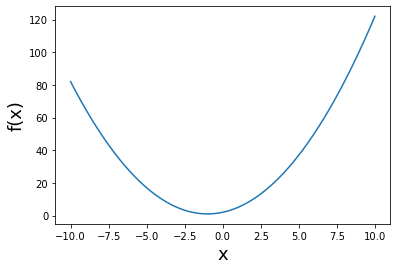

In [4]:
plt.figure() #INITIALIZE FIGURE 
FS=18   #FONT SIZE
plt.xlabel('x', fontsize=FS)
plt.ylabel('f(x)', fontsize=FS)
plt.plot(X,f(X),'-')

Choose a random initial guess for the location (x value) of the minimum  

In [5]:
#INITIAL GUESS FOR X VALUE 
xo=np.random.uniform(xmin,xmax) 
print("xo = ",xo)

xo =  6.997663009794202


Run the minimizer to find the minimizer  
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [6]:
#RUN OPTIMIZER 
print("INITIAL GUESS: xo=",xo, " f(xo)=",f(xo))
res = minimize(f, xo, method='BFGS', tol=1e-5)
popt=res.x
print("EXPECTED SOLUTION: x = ",-1,"y = 1")


2 x= 6.997663009794202 y= 64.96261361823045
INITIAL GUESS: xo= 6.997663009794202  f(xo)= 64.96261361823045
3 x= [6.99766301] y= [64.96261362]
4 x= [6.99766302] y= [64.96261386]
5 x= [5.98766301] y= [49.82743434]
6 x= [5.98766302] y= [49.82743455]
7 x= [3.8000173] y= [24.04016605]
8 x= [3.80001731] y= [24.04016619]
9 x= [-0.99999977] y= [1.]
10 x= [-0.99999975] y= [1.]
EXPECTED SOLUTION: x =  -1 y = 1


# Part-2: The universal machine learning workflow

* As discussed during lecture-1, and in the textbook, many machine learning problems can be represented by a so called "universal ML workflow". 
* In this lab we will work through this process step by step, for a simple case
* The following image summarizes this workflow
* The last two bullets aren't applicable for simple models, however, they become vary important for deep learning. As we will see later in the course.

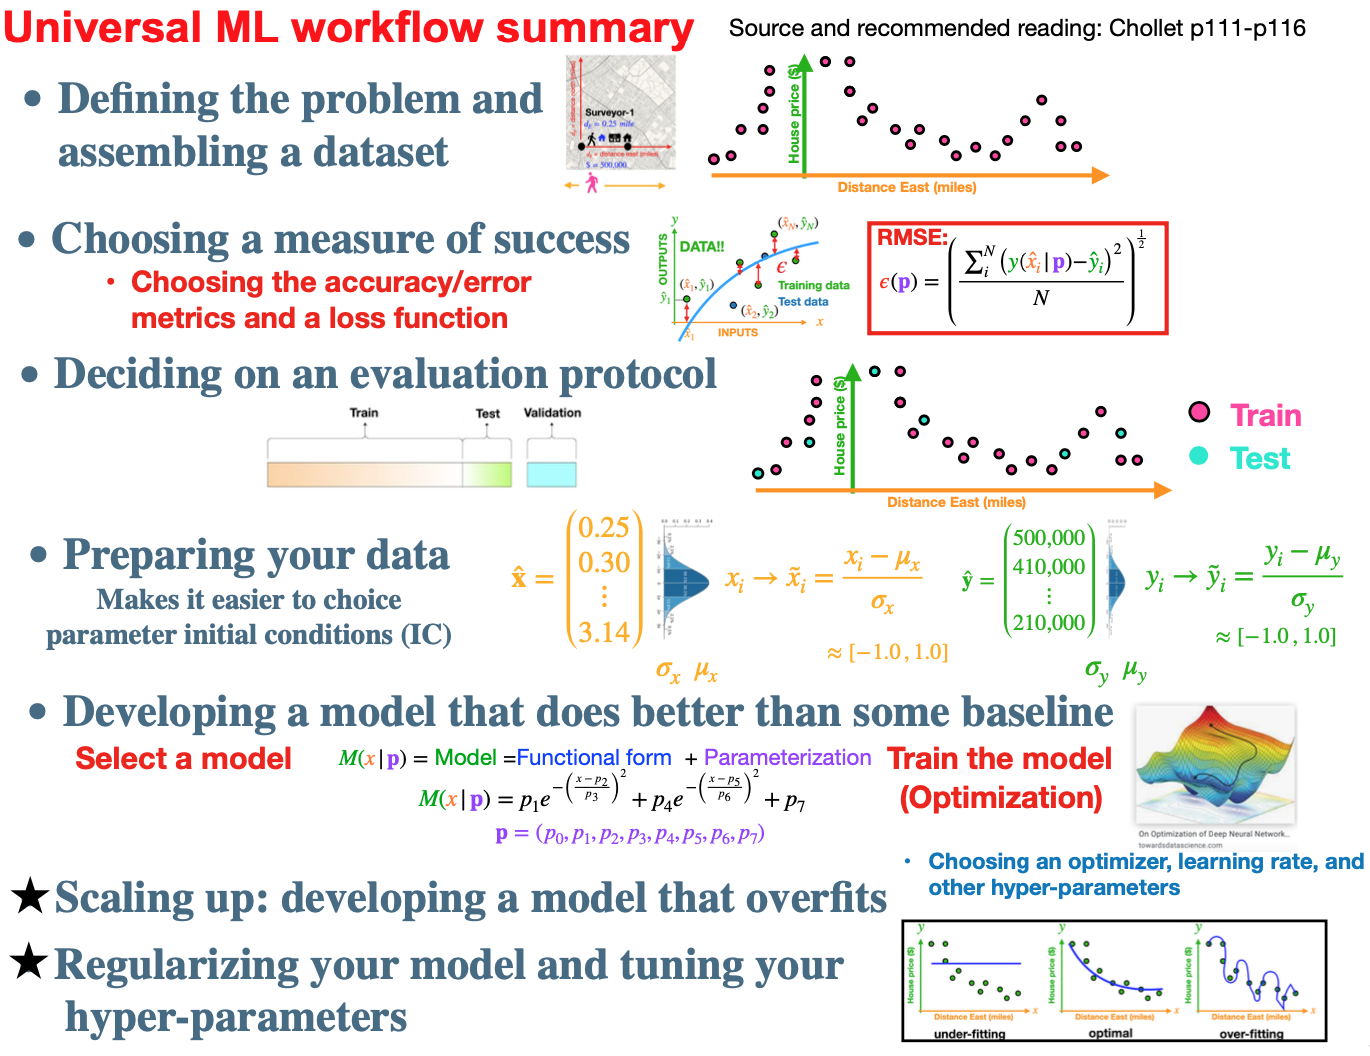

In [8]:
from IPython.display import Image
Image(filename='images/image-1.png', width=600)

### Import packages 

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from   scipy.optimize import curve_fit

### 1) Define "toy" dataset

In [9]:
#GROUND TRUTH FUNCTION
def G(x):
	out=400000.0*np.exp(-((x-0.0)/2.0)**2.0)
	out=out+150000.0*np.exp(-((x-15.0)/1.5)**2.0)
	out=out+100000
	
	return out

In [10]:
#NOISY DATA
N=100; xmin=-10; xmax=20
x = np.linspace(xmin,xmax,N)
ye = G(x)  #PRISTINE DATA
#noise=np.random.normal(loc=0.0, scale=0.05*(max(y)-min(y)),size=len(x))
noise=0.05*(max(ye)-min(ye))*np.random.uniform(-1,1,size=len(x))
y = ye + noise

x = x.reshape(N,1)
y = y.reshape(N,1)
print(x.shape,ye.shape)

(100, 1) (100,)


**ASSIGNMENT** 
* Plot the data and the ground truth function
* This is similar to the "housing" price example discussed in week-01
* see html version of notebook for expected output

Use the following for the axis labels
```
FS=18   #FONT SIZE
plt.xlabel('Distance (miles)', fontsize=FS)
plt.ylabel('House Price ($) ', fontsize=FS)
```

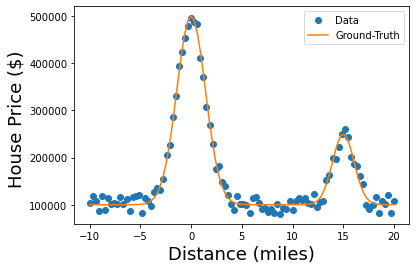

In [11]:
# INSERT CODE HERE
plt.figure()
FS=18   #FONT SIZE
plt.xlabel('Distance (miles)', fontsize=FS)
plt.ylabel('House Price ($) ', fontsize=FS)
plt.plot(x,y, "o")
plt.plot(x,ye,"-")
plt.legend(['Data', 'Ground-Truth'])

### 2) Define a measure of success 
* For our success measure, we will use the root mean square error. 
  * This is arguably the most common regression objective function (i.e error metric).
  
**ASSIGNMENT** 
  * Write an objective function, called "loss", that returns the RMSE for the training set, given a parameterization vector p for a model (see below for more on the model) 
  * This can be done in one line with Numpy component wise operations or with a for loop to compute the sum

In [12]:
def loss(p):
    global x_train, y_train
    #INSERT CODE HERE
    y_act = m(x_train, p)
    mse = 0
    for i in range(len(y_train)):
        mse += np.square(y_act[i] - y_train[i])/len(y_train)
        #rmse = np.linalg.norm(y - y_train) / np.sqrt(len(y_train))
    rmse = np.sqrt(mse)
    return rmse

### 3) Define Evaluation protocol  
  
**ASSIGNMENT** 
  * Split the data into an 80-20 training-validation set
  * Plot the training and validation data together (you can copy, tweak, and recycle your code from the plot above)

In [13]:
# INSERT CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 10)

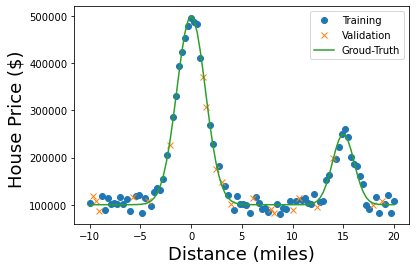

In [14]:
# INSERT CODE HERE
plt.figure()
FS=18   #FONT SIZE
plt.xlabel('Distance (miles)', fontsize=FS)
plt.ylabel('House Price ($) ', fontsize=FS)
plt.plot(x_train, y_train,'o')
plt.plot(x_test, y_test, 'x')
plt.plot(x,ye, "-")
plt.legend(['Training', 'Validation','Groud-Truth'])

### 4) Prepare the data

**ASSIGNMENT** 

* Normalize the x data using x --> (x-u_x)/sigma_x
* Normalize the y data using y --> (y-u_y)/sigma_y
* The quantities u_x, u_y, sigma_x and sigma_y should be stored as variables and computed from the training set
* Re-plot the data, notice how numbers on the axis are dramatically different and range roughly -2 to 2. 
* You don't need to include units since the data has no units after normalization

In [15]:
# INSERT CODE HERE
u_x = np.mean(x_train)
sigma_x = np.std(x_train)
u_y = np.mean(y_train)
sigma_y = np.std(y_train)
x_norm_train = (x_train - u_x) / sigma_x
y_norm_train = (y_train - u_y) / sigma_y
x_norm_test = (x_test - u_x) / sigma_x
y_norm_test = (y_test - u_y) / sigma_y

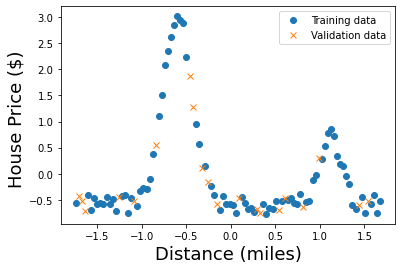

In [16]:
# INSERT CODE HERE
plt.figure()
FS=18   #FONT SIZE
plt.xlabel('Distance (miles)', fontsize=FS)
plt.ylabel('House Price ($) ', fontsize=FS)
plt.plot(x_norm_train, y_norm_train, 'o')
plt.plot(x_norm_test, y_norm_test, 'x')
plt.legend(['Training data', 'Validation data'])

### 4) Choose a model 
**ASSIGNMENT** 

* Write a function `m(x,p)` which takes a vector of data x, and a parameter vector p, and evaluates the model
* Use the parametric fitting model using the double Gaussian from lecture-1 as your model 

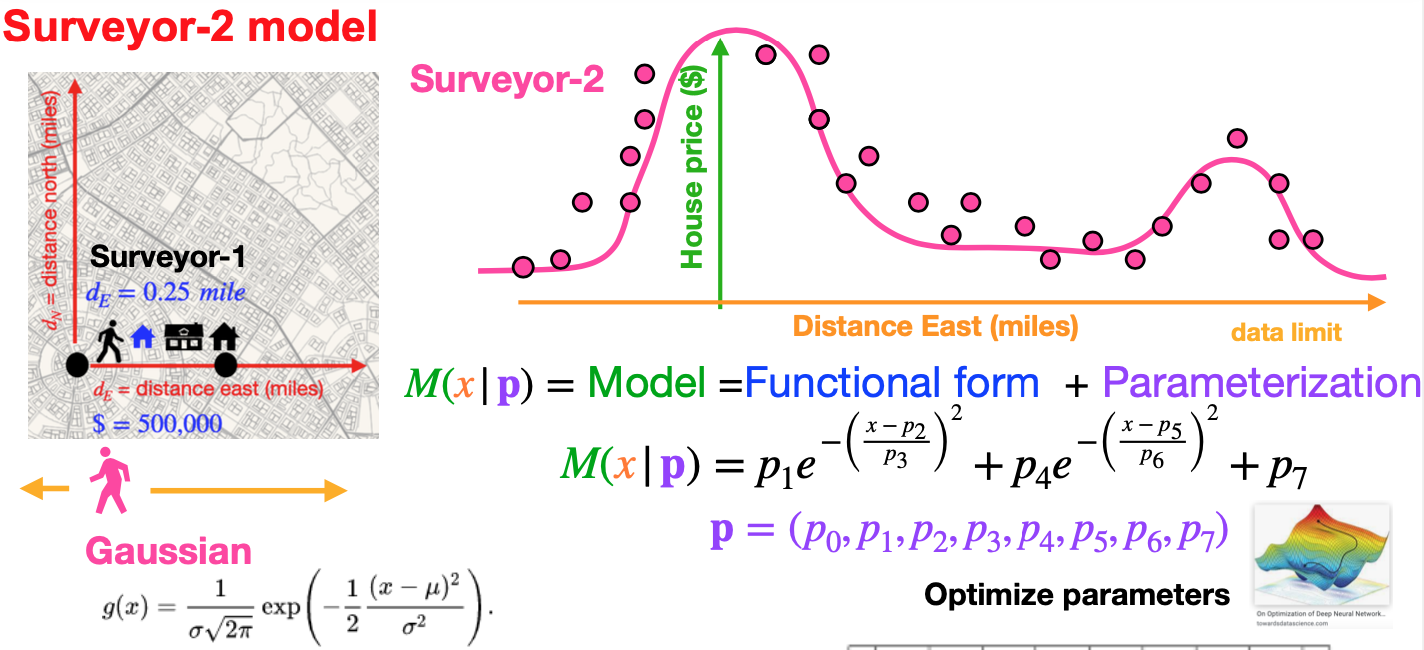

In [17]:
Image(filename='images/image-2.png', width=500)

In [18]:
def m(x,p):
# INSERT CODE HERE
    mod = p[0]*np.exp(-np.square((x-p[1])/p[2])) + p[3]*np.exp(-np.square((x-p[4])/p[5])) + p[6]
    #gaus = 1/(sigma_x*np.sqrt(2*np.pi))*np.exp((-1/2)*(x_norm - u_x)** 2/sigma_x** 2)
    return mod

### 4) Train your model 

**ASSIGNMENT** 
* Choose an initial guess for the parameter vector p
  * If you randomly generate the initial guess, you may have to run the optimization algorithm several times before getting a good fit
  * Remember that "bad fits", correspond to bad choices for the fitting parameters, these occur when the optimizer gets "stuck" in a bad local minima in the parameter space.
  * Optionally, you can ensure a "good fit" every time, by looking at the normalized plot and the functional form of the model and manually choosing fitting parameters that "make sense". 
* Use the Scipy minimizer from Part-1 to minimize the loss function, by varying the components of the parameter vector p, to find the best fit for the model 
* Make predictions with the fitted model for the test and validation data
* plot the predictions in the normalized space
* un-normalize the data so that it has units again
* Plot the results in the un-normalized space

In [19]:
# INSERT CODE HERE
import numpy as np

#From the groung truth function above, I set the initial guess as:
p = [400000, 0,2, 150000, 15,1.5, 100000]
print("INITIAL GUESS: \np=",p, " \nloss(p)=",loss(p))
#po=np.random.uniform(pmin,pmax) 
#print("po = ",po)

#RUN OPTIMIZER 
res = minimize(loss, p, method='BFGS', tol=1e-5)
popt=res.x
p = popt.tolist()
print("OPTIMIZED PARAMETERS: \np = ", p, "\nloss(p) = ", loss(p))

INITIAL GUESS: 
p= [400000, 0, 2, 150000, 15, 1.5, 100000]  
loss(p)= [12274.03996233]
OPTIMIZED PARAMETERS: 
p =  [394580.9996130489, -0.009699779755625132, 2.0447366088170345, 147116.62448661597, 15.088256333257224, 1.4724448960977723, 101253.17655617354] 
loss(p) =  [11815.83721448]


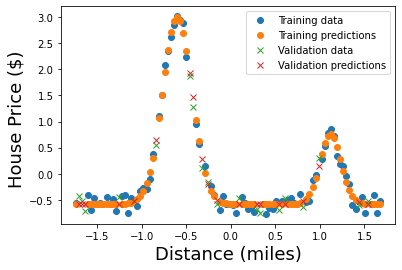

In [20]:
# INSERT CODE HERE
pred_train = (m(x_train,p) - u_y)/ sigma_y
pred_valid = (m(x_test,p) - u_y)/ sigma_y
plt.figure()
FS=18   #FONT SIZE
plt.xlabel('Distance (miles)', fontsize=FS)
plt.ylabel('House Price ($) ', fontsize=FS)
plt.plot(x_norm_train, y_norm_train, 'o')
plt.plot(x_norm_train, pred_train, 'o')
plt.plot(x_norm_test, y_norm_test, 'x')
plt.plot(x_norm_test, pred_valid, 'x')
plt.legend(['Training data', 'Training predictions', 'Validation data', 'Validation predictions'])

In [21]:
# UN-NORMALIZE THE DATA

# INSERT CODE HERE
pred_train_un = m(x_train,p)
pred_valid_un = m(x_test,p)

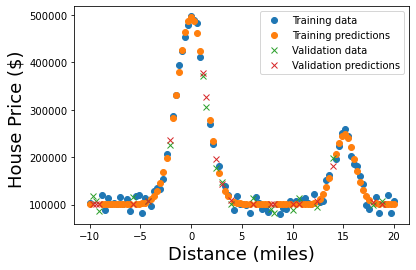

In [22]:
#PLOT THE RESULTS IN THE UN-NORMALIZED SPACE

# INSERT CODE HERE
plt.figure()
FS=18   #FONT SIZE
plt.xlabel('Distance (miles)', fontsize=FS)
plt.ylabel('House Price ($) ', fontsize=FS)
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, pred_train_un, 'o')
plt.plot(x_test, y_test, 'x')
plt.plot(x_test, pred_valid_un, 'x')
plt.legend(['Training data', 'Training predictions', 'Validation data', 'Validation predictions'])

# Part-3: Numpy basics

* Run the following code cells showing basic numpy examples 
* Make sure you understand what they are doing 
* Code modified from: chollet-deep-learning-in-python

### Import function and define function

In [23]:
import numpy as np
from pandas import DataFrame
import time

#QUICK INFO ON NP ARRAY
def np_array_info(X,MESSAGE='SUMMARY'):
	print("\n------------------------")
	print(MESSAGE)
	print("------------------------")
	print("TYPE:",type(X))

	if(str(type(x))=="<class 'numpy.ndarray'>"):

		print("SHAPE:",X.shape)
		print("MIN:",X.min())
		print("MAX:",X.max())
		#NOTE: ADD SLICEING
		print("DTYPE:",X.dtype)
		print("NDIM:",X.ndim)
		print("IS CONTIGUOUS:",X.data.contiguous)
		#PRETTY PRINT 
		if(X.ndim==1 or X.ndim==2 ): 
			print("MATRIX:")
			print(DataFrame(X).to_string(index=False, header=False))
			# print("EDGES ARE INDICES: i=row,j=col") 
			# print(DataFrame(X)) 	
	else:
		print("ERROR: INPUT IS NOT A NUMPY ARRAY")


### Basic data types

In [24]:
#SCALAR (0D TENSOR)
x = np.array(10); 
np_array_info(x)


------------------------
SUMMARY
------------------------
TYPE: <class 'numpy.ndarray'>
SHAPE: ()
MIN: 10
MAX: 10
DTYPE: int64
NDIM: 0
IS CONTIGUOUS: True


In [25]:
#VECTOR AS 1D ARRARY
x = np.array([12, 3, 6, 14]); 
np_array_info(x)


------------------------
SUMMARY
------------------------
TYPE: <class 'numpy.ndarray'>
SHAPE: (4,)
MIN: 3
MAX: 14
DTYPE: int64
NDIM: 1
IS CONTIGUOUS: True
MATRIX:
12
 3
 6
14


In [26]:
#VECTOR AS 2D ARRAY 
x = np.array([12, 3, 6, 14]);  
x=x.reshape(len(x),1); 
np_array_info(x) #COLUMN VECTOR



------------------------
SUMMARY
------------------------
TYPE: <class 'numpy.ndarray'>
SHAPE: (4, 1)
MIN: 3
MAX: 14
DTYPE: int64
NDIM: 2
IS CONTIGUOUS: True
MATRIX:
12
 3
 6
14


In [27]:
x = np.array([12, 3., 6, 14]); 
x=x.reshape(1,len(x)); 
np_array_info(x) #ROW VECTOR


------------------------
SUMMARY
------------------------
TYPE: <class 'numpy.ndarray'>
SHAPE: (1, 4)
MIN: 3.0
MAX: 14.0
DTYPE: float64
NDIM: 2
IS CONTIGUOUS: True
MATRIX:
12.0 3.0 6.0 14.0


In [28]:
#MATRIX (2D TENSOR)
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]]); 
np_array_info(x)


------------------------
SUMMARY
------------------------
TYPE: <class 'numpy.ndarray'>
SHAPE: (3, 5)
MIN: 0
MAX: 80
DTYPE: int64
NDIM: 2
IS CONTIGUOUS: True
MATRIX:
5 78 2 34 0
6 79 3 35 1
7 80 4 36 2


In [29]:
# #3D TENSOR
x = np.array([[[5., 78, 2, 34, 0],
			   [6, 79, 3, 35, 1],
			   [7, 80, 4, 36, 2]],
			  [[5, 78, 2, 34, 0],
			   [6, 79, 3, 35, 1],
			   [7, 80, 4, 36, 2]],
			  [[5, 78, 2, 34, 0],
			   [6, 79, 3, 35, 1],
			   [7, 80, 4, 36, 2]]]) ; 
np_array_info(x,"3D TENSOR")


------------------------
3D TENSOR
------------------------
TYPE: <class 'numpy.ndarray'>
SHAPE: (3, 3, 5)
MIN: 0.0
MAX: 80.0
DTYPE: float64
NDIM: 3
IS CONTIGUOUS: True


### TRANSPOSE AND RESHAPE

In [30]:
x = np.array([[11, 12, 13],
            [21, 22, 23]]); 
np_array_info(x, "BEFORE TRANSPOSE")
np_array_info(np.transpose(x), "AFTER  TRANSPOSE")


------------------------
BEFORE TRANSPOSE
------------------------
TYPE: <class 'numpy.ndarray'>
SHAPE: (2, 3)
MIN: 11
MAX: 23
DTYPE: int64
NDIM: 2
IS CONTIGUOUS: True
MATRIX:
11 12 13
21 22 23

------------------------
AFTER  TRANSPOSE
------------------------
TYPE: <class 'numpy.ndarray'>
SHAPE: (3, 2)
MIN: 11
MAX: 23
DTYPE: int64
NDIM: 2
IS CONTIGUOUS: True
MATRIX:
11 21
12 22
13 23


In [31]:
#RESHAPING 
x = np.array([[11, 12, 13, 14],
              [21, 22, 23, 24],
              [31, 32, 33, 34],
              [41, 42, 43, 44], 
              [51, 52, 53, 54]]); 
            
np_array_info(x.reshape(x.shape[0]*x.shape[1],1), "x.reshape(x.shape[0]*x.shape[1],1)")
np_array_info(x.reshape(1,x.shape[0]*x.shape[1]), "x.reshape(1,x.shape[0]*x.shape[1])")
np_array_info(x.reshape(int(x.shape[0]*x.shape[1]/2),2), "x.reshape(int(x.shape[0]*x.shape[1]/2),2)")



------------------------
x.reshape(x.shape[0]*x.shape[1],1)
------------------------
TYPE: <class 'numpy.ndarray'>
SHAPE: (20, 1)
MIN: 11
MAX: 54
DTYPE: int64
NDIM: 2
IS CONTIGUOUS: True
MATRIX:
11
12
13
14
21
22
23
24
31
32
33
34
41
42
43
44
51
52
53
54

------------------------
x.reshape(1,x.shape[0]*x.shape[1])
------------------------
TYPE: <class 'numpy.ndarray'>
SHAPE: (1, 20)
MIN: 11
MAX: 54
DTYPE: int64
NDIM: 2
IS CONTIGUOUS: True
MATRIX:
11 12 13 14 21 22 23 24 31 32 33 34 41 42 43 44 51 52 53 54

------------------------
x.reshape(int(x.shape[0]*x.shape[1]/2),2)
------------------------
TYPE: <class 'numpy.ndarray'>
SHAPE: (10, 2)
MIN: 11
MAX: 54
DTYPE: int64
NDIM: 2
IS CONTIGUOUS: True
MATRIX:
11 12
13 14
21 22
23 24
31 32
33 34
41 42
43 44
51 52
53 54


### SLICING

In [32]:
x = np.array([[11, 12, 13, 14],
              [21, 22, 23, 24],
              [31, 32, 33, 34],
              [41, 42, 43, 44], 
              [51, 52, 53, 54]]); 

In [33]:
np_array_info(x, "BEFORE SLICING")


------------------------
BEFORE SLICING
------------------------
TYPE: <class 'numpy.ndarray'>
SHAPE: (5, 4)
MIN: 11
MAX: 54
DTYPE: int64
NDIM: 2
IS CONTIGUOUS: True
MATRIX:
11 12 13 14
21 22 23 24
31 32 33 34
41 42 43 44
51 52 53 54


In [34]:
#NOTICE HOW ITS INCLUSIVE ON THE LEFT
#AND EXCLUSIVE ON THE RIGHT
np_array_info(x[:,1], 	 "SLICE-1: x[:,1]")
np_array_info(x[2,:], 	"SLICE-2: x[2,:]")
np_array_info(x[1:3], 	"SLICE-3: x[1:3]")
np_array_info(x[:,-3:-1],"SLICE-4: x[:,-3:-1]")
np_array_info(x[:,0:2], 	"SLICE-5: x[:,0:2]")


------------------------
SLICE-1: x[:,1]
------------------------
TYPE: <class 'numpy.ndarray'>
SHAPE: (5,)
MIN: 12
MAX: 52
DTYPE: int64
NDIM: 1
IS CONTIGUOUS: False
MATRIX:
12
22
32
42
52

------------------------
SLICE-2: x[2,:]
------------------------
TYPE: <class 'numpy.ndarray'>
SHAPE: (4,)
MIN: 31
MAX: 34
DTYPE: int64
NDIM: 1
IS CONTIGUOUS: True
MATRIX:
31
32
33
34

------------------------
SLICE-3: x[1:3]
------------------------
TYPE: <class 'numpy.ndarray'>
SHAPE: (2, 4)
MIN: 21
MAX: 34
DTYPE: int64
NDIM: 2
IS CONTIGUOUS: True
MATRIX:
21 22 23 24
31 32 33 34

------------------------
SLICE-4: x[:,-3:-1]
------------------------
TYPE: <class 'numpy.ndarray'>
SHAPE: (5, 2)
MIN: 12
MAX: 53
DTYPE: int64
NDIM: 2
IS CONTIGUOUS: False
MATRIX:
12 13
22 23
32 33
42 43
52 53

------------------------
SLICE-5: x[:,0:2]
------------------------
TYPE: <class 'numpy.ndarray'>
SHAPE: (5, 2)
MIN: 11
MAX: 52
DTYPE: int64
NDIM: 2
IS CONTIGUOUS: False
MATRIX:
11 12
21 22
31 32
41 42
51 52


### BROADCAST

In [35]:
np_array_info(x,        "BEFORE BROADCAST")
np_array_info(x+1000,   "ADD 1000 TO ALL")
np_array_info(x+x[0,:], "ADD FIRST ROW TO EACH ROW")


------------------------
BEFORE BROADCAST
------------------------
TYPE: <class 'numpy.ndarray'>
SHAPE: (5, 4)
MIN: 11
MAX: 54
DTYPE: int64
NDIM: 2
IS CONTIGUOUS: True
MATRIX:
11 12 13 14
21 22 23 24
31 32 33 34
41 42 43 44
51 52 53 54

------------------------
ADD 1000 TO ALL
------------------------
TYPE: <class 'numpy.ndarray'>
SHAPE: (5, 4)
MIN: 1011
MAX: 1054
DTYPE: int64
NDIM: 2
IS CONTIGUOUS: True
MATRIX:
1011 1012 1013 1014
1021 1022 1023 1024
1031 1032 1033 1034
1041 1042 1043 1044
1051 1052 1053 1054

------------------------
ADD FIRST ROW TO EACH ROW
------------------------
TYPE: <class 'numpy.ndarray'>
SHAPE: (5, 4)
MIN: 22
MAX: 68
DTYPE: int64
NDIM: 2
IS CONTIGUOUS: True
MATRIX:
22 24 26 28
32 34 36 38
42 44 46 48
52 54 56 58
62 64 66 68
